In [1]:
from demon import *

In [2]:
# a pretrained model
np.random.seed(324)
low, high, sample_size = -20, 20, 100
Xtr = np.random.uniform(low, high, sample_size)
Ytr = generate_response(Xtr, 1)

kernel = GPy.kern.RBF(input_dim=1)
model = GPy.models.GPRegression(Xtr.reshape(-1,1), Ytr.reshape(-1,1), kernel)

# optimize the model parameters
model.optimize()
# good model 
fb = model.predict

In [3]:
np.random.seed(324)
low, high, sample_size = -20, 20, 100
Xtr = np.random.uniform(low, high, sample_size)
Ytr = generate_response(Xtr, 0.1)

kernel = GPy.kern.RBF(input_dim=1)
model = GPy.models.GPRegression(Xtr.reshape(-1,1), Ytr.reshape(-1,1), kernel)

# optimize the model parameters
model.optimize()
# bad model
fg = model.predict

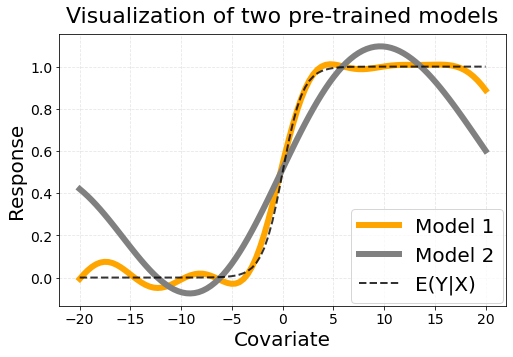

In [4]:
Xtr = np.linspace(-20,20, 100)

fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(Xtr, fg(Xtr.reshape(-1,1))[0], linewidth = 6, color = 'orange', label='Model 1')
plt.plot(Xtr, fb(Xtr.reshape(-1,1))[0], linewidth = 6, color = 'gray',label='Model 2')

plt.plot(Xtr, sigmoid(Xtr), color='black', linestyle = 'dashed', 
             linewidth=2, alpha = 0.8, label='E(Y|X)')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.grid(True,  linestyle='--', alpha=0.3)
plt.legend(loc = 'lower right', fontsize = 20, borderaxespad=0.15)

plt.legend(loc = 'lower right', fontsize = 20, borderaxespad=0.15)

plt.xlabel('Covariate', fontsize=20)
plt.ylabel('Response', fontsize=20)
plt.title('Visualization of two pre-trained models', fontsize=22, y = 1.02)
plt.savefig('/Users/mufangying/Desktop/ICP/figures/'+'two_pretrained_model' +'.pdf')

# Fixing mean

In [5]:
def compute_length(f_list, generate_data, WCP, n, R):
    fg = f_list[0]
    fb = f_list[1]
    
    stds = np.linspace(0.5, 2.5, num = 20)
    mean_train,  mean_test, std_test, y_noise_scale = 0, 0, 3 , 0.1
    
    fg_len = np.zeros((R, len(stds)))
    fb_len = np.zeros((R, len(stds)))
    
    fg_mean_len = np.zeros(len(stds))
    fb_mean_len = np.zeros(len(stds))
    
    for i in range(len(stds)):
        std_train = stds[i]
        for r in range(R):
            Xtr, Ytr, Xtest, Ytest = generate_data( n,
                                                   mean_train, std_train,
                                                   mean_test, std_test, y_noise_scale)
            qhat = WCP(Xtest[0], fg, Xtr, Ytr, w,  mean_train, std_train,
                       mean_test, std_test, 0.1)
            
            fg_len[r,i] = 2*qhat
            
            qhat = WCP(Xtest[0], fb, Xtr, Ytr, w,  mean_train, std_train,
                       mean_test, std_test, 0.1)
            fb_len[r,i] = 2*qhat

            
        fg_mean_len[i] = np.mean( fg_len[~np.isinf(fg_len[:,i]),i])
        fb_mean_len[i] = np.mean( fb_len[~np.isinf(fb_len[:,i]),i])


    return  fg_mean_len, fb_mean_len

In [6]:
np.random.seed(324)
n_list = [10, 50, 100]
fg_length_list = []
fb_length_list = []

for n in n_list:
    a, b = compute_length([fg,fb], generate_data, WCP, n, 10000)
    fg_length_list.append(a)
    fb_length_list.append(b)

# Length computation by using different models

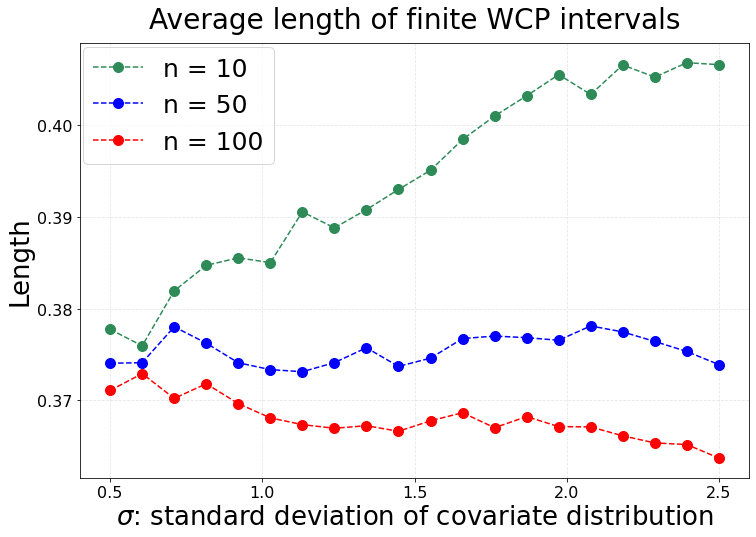

In [12]:
stds = np.linspace(0.5, 2.5, num = 20)

# color list
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(stds, fg_length_list[0], marker='o',  markersize=10, linestyle='--', color='seagreen', label='n = 10')
plt.plot(stds, fg_length_list[1], marker='o',  markersize=10, linestyle='--', color='blue', label='n = 50')
plt.plot(stds, fg_length_list[2], marker='o',  markersize=10, linestyle='--', color='red', label='n = 100')



plt.xticks(np.arange(0.5, 2.51, 0.5))
# plt.yticks(np.arange(0.36, 0.415, 0.1))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True,  linestyle='--', alpha=0.3)
plt.legend(loc = 'upper left', fontsize = 25, borderaxespad=0.15)

plt.xlabel(r'$\sigma$: standard deviation of covariate distribution', fontsize=26)
plt.ylabel('Length', fontsize=26)
plt.title('Average length of finite WCP intervals', fontsize=28, y = 1.02)

plt.savefig('/Users/mufangying/Desktop/ICP/figures/'+'fix_mean_length_better_f' +'.pdf')

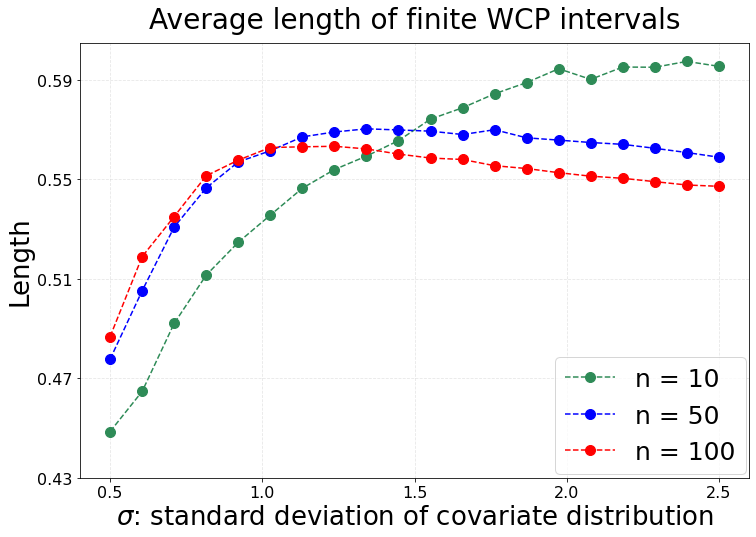

In [11]:
stds = np.linspace(0.5, 2.5, num = 20)

# color list
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(stds, fb_length_list[0], marker='o',  markersize=10, linestyle='--', color='seagreen', label='n = 10')
plt.plot(stds, fb_length_list[1], marker='o',  markersize=10, linestyle='--', color='blue', label='n = 50')
plt.plot(stds, fb_length_list[2], marker='o',  markersize=10, linestyle='--', color='red', label='n = 100')



plt.xticks(np.arange(0.5, 2.51, 0.5))
plt.yticks(np.arange(0.43, 0.62, 0.04))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True,  linestyle='--', alpha=0.3)
plt.legend(loc = 'lower right', fontsize = 25, borderaxespad=0.15)

plt.xlabel(r'$\sigma$: standard deviation of covariate distribution', fontsize=26)
plt.ylabel('Length', fontsize=26)
plt.title('Average length of finite WCP intervals', fontsize=28, y = 1.02)

plt.savefig('/Users/mufangying/Desktop/ICP/figures/'+'fix_mean_length' +'.pdf')